# Basic Data Frame Processing with `dfply`

In [32]:
import pandas as pd
import matplotlib.pylab as plt
from dfply import *
%matplotlib inline

In [6]:
artists = pd.read_csv("./data/Artists.csv")
artwork = pd.read_csv("./data/Artworks.csv")

# Exploring and cleaning the MoMA data

In the previous lecture, we identified some errors

* Multiple instances of "Nationality unknown" in `artists.Nationality`
* `artist.BeginDate` is 0 $\rightarrow$ probably should be missing
* Parentheses in `artwork.BeginDate`
* Very large value in `artwork['Height (cm)']`

In this section, we will illustrate exploring and cleaning up these data with `select`, `filter_by` and `mutate`

## Renaming columns the `dfply` way

* We use `rename` to rename columns as part of a pipe.
* We can use `kwargs` to rename all columns at once

In [8]:
artists_renamed = artists >>rename(Wiki_QID = 'Wiki QID')
artists_renamed.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Renaming all the columns at once

1. Make a translation dictionary
2. Pass to `rename` by unpacking keywords with `**`

## Step 1 - Translation dictionary

* keys: New name
* values: Old name

In [9]:
fix_col_name = lambda s: s.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')


new_cols = {fix_col_name(name):name 
            for name in artwork.columns}

new_cols

{'Title': 'Title',
 'Artist': 'Artist',
 'ConstituentID': 'ConstituentID',
 'ArtistBio': 'ArtistBio',
 'Nationality': 'Nationality',
 'BeginDate': 'BeginDate',
 'EndDate': 'EndDate',
 'Gender': 'Gender',
 'Date': 'Date',
 'Medium': 'Medium',
 'Dimensions': 'Dimensions',
 'CreditLine': 'CreditLine',
 'AccessionNumber': 'AccessionNumber',
 'Classification': 'Classification',
 'Department': 'Department',
 'DateAcquired': 'DateAcquired',
 'Cataloged': 'Cataloged',
 'ObjectID': 'ObjectID',
 'URL': 'URL',
 'ThumbnailURL': 'ThumbnailURL',
 'Circumference_cm': 'Circumference (cm)',
 'Depth_cm': 'Depth (cm)',
 'Diameter_cm': 'Diameter (cm)',
 'Height_cm': 'Height (cm)',
 'Length_cm': 'Length (cm)',
 'Weight_kg': 'Weight (kg)',
 'Width_cm': 'Width (cm)',
 'Seat_Height_cm': 'Seat Height (cm)',
 'Duration_sec': 'Duration (sec.)'}

## Step 2 - Unpack in `rename` 

In [10]:
artwork_renamed = (artwork >>
                     rename(**new_cols))
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## OR use `more_dfply.fix_names`

Fix names removes all punctuation

In [11]:
from more_dfply import fix_names
artwork_renamed = (artwork >> fix_names)
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## Example 1 - Problems with `artist.Nationality`

In [28]:
artists_renamed.Nationality.value_counts()

American       5194
German          969
British         854
French          848
Italian         539
               ... 
Catalan           1
Afghan            1
Bangladeshi       1
Sahrawi           1
Salvadoran        1
Name: Nationality, Length: 118, dtype: int64

In [29]:
artists_renamed.Nationality.value_counts().index

Index(['American', 'German', 'British', 'French', 'Italian', 'Japanese',
       'Swiss', 'Dutch', 'Russian', 'Austrian',
       ...
       'Cameroonian', 'Sudanese', 'Coptic', 'Ivorian', 'Kuwaiti', 'Catalan',
       'Afghan', 'Bangladeshi', 'Sahrawi', 'Salvadoran'],
      dtype='object', length=118)

In [30]:
[tup for tup in zip(artists.Nationality.value_counts().index, artists.Nationality.value_counts())]

[('American', 5194),
 ('German', 969),
 ('British', 854),
 ('French', 848),
 ('Italian', 539),
 ('Japanese', 509),
 ('Swiss', 294),
 ('Dutch', 277),
 ('Russian', 267),
 ('Austrian', 242),
 ('Canadian', 193),
 ('Nationality unknown', 180),
 ('Brazilian', 163),
 ('Spanish', 160),
 ('Argentine', 140),
 ('Swedish', 130),
 ('Polish', 130),
 ('Mexican', 129),
 ('Danish', 119),
 ('Belgian', 93),
 ('Chinese', 80),
 ('Czech', 78),
 ('Israeli', 74),
 ('Chilean', 72),
 ('South African', 68),
 ('Cuban', 63),
 ('Finnish', 61),
 ('Venezuelan', 60),
 ('Australian', 55),
 ('Colombian', 54),
 ('Hungarian', 53),
 ('Norwegian', 47),
 ('Indian', 38),
 ('Peruvian', 37),
 ('Korean', 34),
 ('Croatian', 27),
 ('Uruguayan', 24),
 ('Yugoslav', 23),
 ('Turkish', 22),
 ('Irish', 22),
 ('Romanian', 20),
 ('Scottish', 20),
 ('New Zealander', 17),
 ('Haitian', 16),
 ('Portuguese', 13),
 ('Icelandic', 12),
 ('Greek', 12),
 ('Ukrainian', 11),
 ('Serbian', 11),
 ('Iranian', 11),
 ('Slovenian', 9),
 ('Bosnian', 8),
 ('E

In [33]:
(artists_renamed
>> filter_by(X.Nationality.isnull())
)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
90,101,Album-miscellaneous,Various,NaN,NaN,0,0,NaN,NaN
173,201,Aoki Toshio,NaN,NaN,NaN,0,0,NaN,NaN
462,525,Palme Berthold,NaN,NaN,NaN,0,0,NaN,NaN
977,1102,Chikuchi Toshio,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15201,132427,Krasnyi proletarii,NaN,NaN,NaN,0,0,NaN,NaN
15214,132956,Matthew Wong,"Canadian, 1984 - 2019",NaN,NaN,0,0,NaN,NaN
15216,133005,Chesnutt Brothers Studio,NaN,NaN,NaN,0,0,NaN,NaN
15220,133027,Studio of Dr. Paul Wolff & Tritschler,NaN,NaN,NaN,0,0,NaN,NaN


### <font color="red"> Question </font>

Is it ok to have both `Nationality unknown` and `NaN`?  What would you do if your answer was no?

I would say no because they answer the same thing. It their nationality was unkown then they are not application (NaN). It would be redundant to have both values for nationality.

## Example 2 - Zeros $\rightarrow$ `np.Nan`

Recall that `artists.BeginDate` had lots of zeros

<AxesSubplot:ylabel='Frequency'>

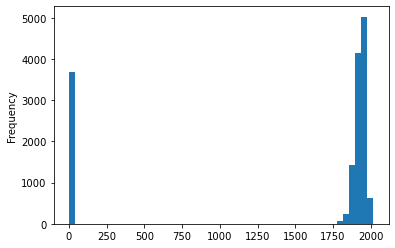

In [35]:
import matplotlib.pylab as plt
artists_renamed.BeginDate.plot(kind='hist', bins = 50)

## Cases with `BeginDate != 0`

Start by looking at the correct cases.  Take note of the `ArtistBio`

In [36]:
(artists_renamed >>
  filter_by(X.BeginDate != 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Cases with `BeginDate == 0`

Note the date in the `ArtistBio` $\rightarrow$ pretty clear this is missing data

In [37]:
(artists_renamed >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
17,22,Isidora Aschheim,Israeli,Israeli,Female,0,0,NaN,NaN
26,32,Atelier Eggers,French,French,NaN,0,0,NaN,NaN
27,33,A.A.P.,American,American,NaN,0,0,NaN,NaN
47,55,Norman Ackroyd,British,British,Male,0,0,Q7051892,500029028.0


## The solution: Replace 0 with `np.NaN`

In [38]:
replace_zero = {0:np.NaN}
artists_new = (artists_renamed >>
                mutate(BeginDate = X.BeginDate.replace(replace_zero)))

## Verify that it works

In [39]:
(artists_new >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN


<AxesSubplot:ylabel='Frequency'>

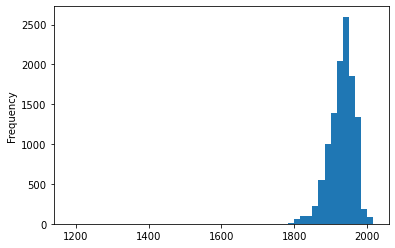

In [41]:
artists_new.BeginDate.plot(kind='hist', bins = 50)

## Next Up

Now you should be ready to tackle [Lab 1](./lab_1_cleaning_up_the_MoMA_artwork.ipynb), which focuses on cleaning up the MoMA artwork file.